In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import matplotlib as mpl
import copy
from Paths import Figure_Save_Path, RG_Threshold_MLD_Path, RG_HolteTalley_MLD_Path
plt.rcParams["font.family"] = "Serif"

/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


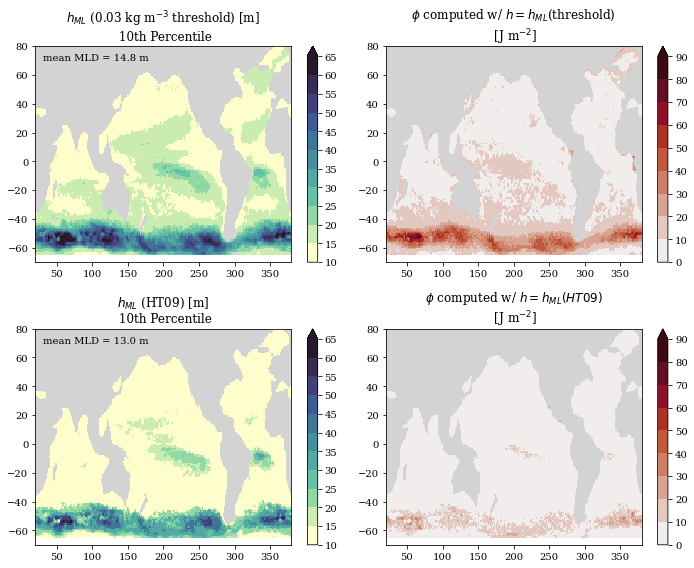

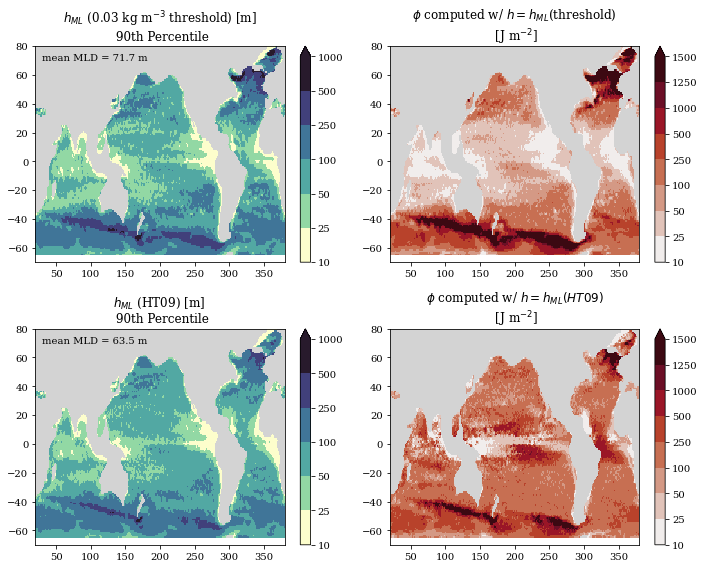

In [2]:
for PCT,FGstr in [[10,'Figure3'],[90,'Figure4']]:
    #
    if PCT==90:
        levels = [10,25,50,100,250,500,1000]
        levels2 = [10,25,50,100,250,500,1000,1250,1500]
    elif PCT==10:
        levels = np.arange(10,70,5)
        levels2 = np.arange(0,100,10)


    Obs = xr.open_dataset(RG_Threshold_MLD_Path)

    F,A = plt.subplots(2,2,figsize=(10,8))

    cmap = copy.copy(cmocean.cm.deep)
    ax=A.ravel()[0]
    MLD=np.nanpercentile(Obs.mld[:,:,:],PCT,axis=0)
    CL=ax.pcolormesh(Obs.lon,Obs.lat,MLD,
                     cmap=cmap,shading='nearest',
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False))
    plt.colorbar(CL,ax=ax,extend='max',ticks=levels)
    CL.cmap.set_bad('lightgray')
    ax.set_ylim(-70,80)
    ax.set_title(r'$h_{ML}$ (0.03 kg m$^{-3}$ threshold) [m]'+' \n '+str(PCT)+'th Percentile')
    MLDmean = np.nanmean(MLD*np.broadcast_to(np.cos(Obs.lat*np.pi/180),np.shape(MLD.T)).T)
    ax.text(30,70,'mean MLD = {:4.1f} m'.format(MLDmean))

    cmap2 = copy.copy(cmocean.cm.amp)
    VMAX=200
    ax=A.ravel()[1]
    PEFilt = Obs.pe_anom.values
    PEFilt[Obs.pe_anom<0]=np.NaN
    CL=ax.pcolormesh(Obs.lon,Obs.lat,np.nanpercentile(PEFilt,PCT,axis=0),
                     cmap=cmap2,shading='nearest',
                     norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N, clip=False))
    plt.colorbar(CL,ax=ax,extend='max')
    CL.cmap.set_bad('lightgray')
    ax.set_ylim(-70,80)
    ax.set_title(r'$\phi$ computed w/ $h=h_{ML}$(threshold)'+'\n [J m$^{-2}$]')

    Obs = xr.open_dataset(RG_HolteTalley_MLD_Path)

    ax=A.ravel()[2]
    MLD=Obs.mld[:,:,:].values
    MLD[MLD==0.0]=np.NaN
    MLD=np.nanpercentile(MLD,PCT,axis=0)
    CL=ax.pcolormesh(Obs.lon,Obs.lat,MLD,
                     cmap=cmap,shading='nearest',
                     norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False))
    plt.colorbar(CL,ax=ax,extend='max',ticks=levels)
    CL.cmap.set_bad('lightgray')
    ax.set_ylim(-70,80)
    ax.set_title('$h_{ML}$ (HT09) [m] \n '+str(PCT)+'th Percentile')
    MLDmean = np.nanmean(MLD*np.broadcast_to(np.cos(Obs.lat*np.pi/180),np.shape(MLD.T)).T)
    ax.text(30,70,'mean MLD = {:4.1f} m'.format(MLDmean))

    ax=A.ravel()[3]
    PEFilt = Obs.pe_anom.values
    PEFilt[Obs.pe_anom<=0]=np.NaN
    CL=ax.pcolormesh(Obs.lon,Obs.lat,np.nanpercentile(PEFilt,PCT,axis=0),
                     cmap=cmap2,shading='nearest',
                     norm = mpl.colors.BoundaryNorm(levels2, ncolors=cmap2.N, clip=False))
    plt.colorbar(CL,ax=ax,extend='max')
    CL.cmap.set_bad('lightgray')
    ax.set_ylim(-70,80)
    ax.set_title('$\phi$ computed w/ $h=h_{ML}(HT09)$\n [J m$^{-2}$]')

    plt.tight_layout()

    plt.savefig(Figure_Save_Path+'/'+FGstr+'ArgoRG_PEAnom_'+str(PCT)+'.png')
